In [23]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import os
import seaborn as sns

In [2]:
#read in the csv file
file_path = os.path.join("Resources", "life_expectancy_data_region.csv")
life_df = pd.read_csv(file_path)

life_df.head()

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#get value counts of each region
life_df["Region"].value_counts()

Europe                   802
Africa                   752
Americas                 530
Western Pacific          342
Eastern Mediterranean    336
South-East Asia          176
Name: Region, dtype: int64

In [4]:
#get list of columns in df
life_df.columns

Index(['Country', 'Year', 'Region', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
#trim the dataframe to the columns that we need
life_df = life_df[["Country", "Year", "Region", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", 
                   "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure",
                  "Diphtheria ", " HIV/AIDS", "GDP", "Population", "Schooling"]]
life_df.head()

,Country,Year,Region,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5


In [6]:
#rename columns
life_df = life_df.rename(columns={'Life expectancy ': 'Life Expectancy', 
                        'percentage expenditure': 'Percentage Expenditure',
                        'Measles ': 'Measles',
                        ' BMI ': 'BMI',
                        "Total expenditure": "Total Expenditure",
                        "Diphtheria ": "Diphtheria",
                        " HIV/AIDS": "HIV/AIDS"
                        })  

In [8]:
#trim the dataframe to just focus on the effect of schooling on life expectancy and include the country, year, and 
#status columns
schooling_df = life_df[["Country", "Year", "Region", "Status", "Life Expectancy", "Schooling"]]


In [9]:
#get count of each column in the trimmed df
schooling_df.count()

Country            2938
Year               2938
Region             2938
Status             2938
Life Expectancy    2928
Schooling          2775
dtype: int64

In [10]:
#drop na's
schooling_df = schooling_df.dropna()

In [11]:
#count to ensure clean/uniform df
schooling_df.count()

Country            2768
Year               2768
Region             2768
Status             2768
Life Expectancy    2768
Schooling          2768
dtype: int64

In [12]:
#remove rows where schooling == 0
schooling_df = schooling_df.loc[schooling_df["Schooling"] != 0]

schooling_df.count()

Country            2742
Year               2742
Region             2742
Status             2742
Life Expectancy    2742
Schooling          2742
dtype: int64

In [13]:
#plot average life expectancy globally over the years for developed and developing countries

#create a df of just developed countries
developed_main = schooling_df.loc[schooling_df["Status"] == "Developed"]

#create a dataframe groupedby year for the developed countries
year_df_developed = developed_main.groupby(["Year"]).mean()
year_df_developed = year_df_developed.reset_index()
year_df_developed

,Year,Life Expectancy,Schooling
0,2000,76.841379,14.982759
1,2001,77.175862,15.124138
2,2002,77.620690,15.317241
3,2003,78.048276,15.431034
4,2004,78.489655,15.662069
5,2005,78.706897,15.600000
6,2006,79.262069,15.758621
7,2007,79.420690,15.782759
8,2008,79.000000,15.903448
9,2009,79.658621,15.975862


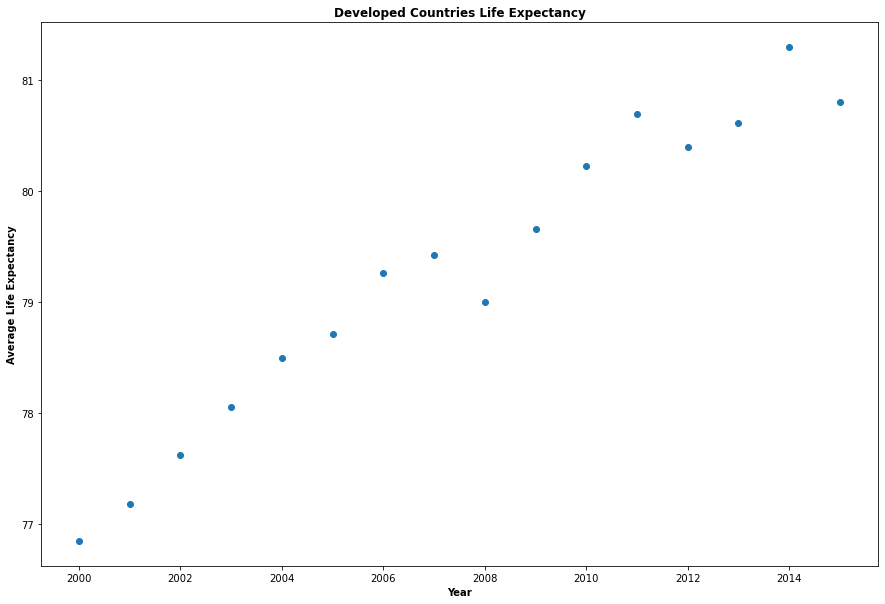

In [15]:
#change fig size
plt.figure(figsize = (15,10))

#plot life expectancy over the years for developed countries
plt.scatter(year_df_developed["Year"], year_df_developed["Life Expectancy"])
plt.title("Developed Countries Life Expectancy", fontweight = "bold")
plt.ylabel("Average Life Expectancy", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.savefig("Images/developed_countries_life_scatter.png")
plt.show()



In [16]:
#create a df of just developing countries
developing_main = schooling_df.loc[schooling_df["Status"] == "Developing"]

#create a dataframe groupedby year for the developing countries
year_df_developing = developing_main.groupby(["Year"]).mean()
year_df_developing = year_df_developing.reset_index()
year_df_developing

,Year,Life Expectancy,Schooling
0,2000,64.951471,10.177941
1,2001,65.267376,10.324823
2,2002,65.407092,10.518440
3,2003,65.370922,10.700709
4,2004,65.677465,10.869718
5,2005,66.335211,11.038732
6,2006,66.829371,11.222378
7,2007,67.235664,11.362937
8,2008,67.741259,11.505594
9,2009,68.232168,11.653846


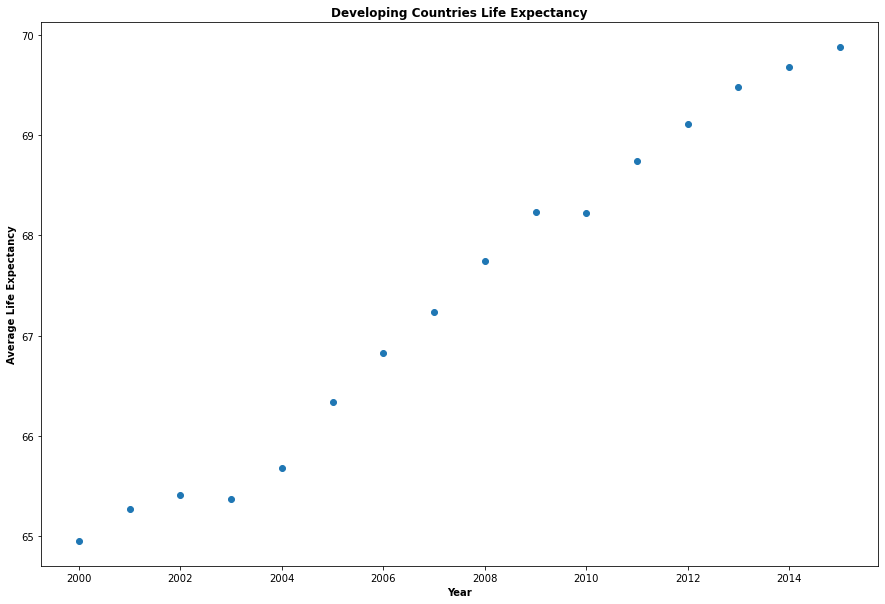

In [17]:
#change fig size
plt.figure(figsize = (15,10))

#plot life expectancy over the years for developing countries
plt.scatter(year_df_developing["Year"], year_df_developing["Life Expectancy"])
plt.title("Developing Countries Life Expectancy", fontweight = "bold")
plt.ylabel("Average Life Expectancy", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.savefig("Images/developing_countries_life_scatter.png")
plt.show()

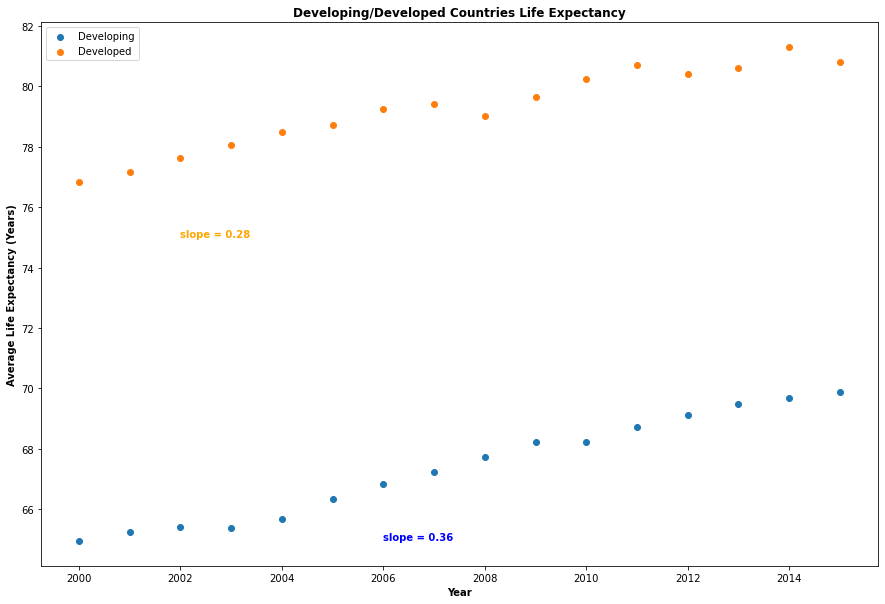

In [52]:
#change fig size
plt.figure(figsize = (15,10))

#plot developed and developing countries life expectancy on the same plot
plt.scatter(year_df_developing["Year"], year_df_developing["Life Expectancy"], label = "Developing")
plt.scatter(year_df_developed["Year"], year_df_developed["Life Expectancy"], label = "Developed")


#get slope for each line
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(year_df_developed["Year"], year_df_developed["Life Expectancy"])
slope3 = round(slope3, 2)

(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(year_df_developing["Year"], year_df_developing["Life Expectancy"])
slope4 = round(slope4, 2)

#label plot
plt.title("Developing/Developed Countries Life Expectancy", fontweight = "bold")
plt.ylabel("Average Life Expectancy (Years)", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.annotate(f"slope = {slope3}", (2002, 75), color = "orange", fontweight = "bold")
plt.annotate(f"slope = {slope4}", (2006, 65), color = "b", fontweight = "bold")
plt.legend()

plt.savefig("Images/combined_countries_life_expectancy")
plt.show()

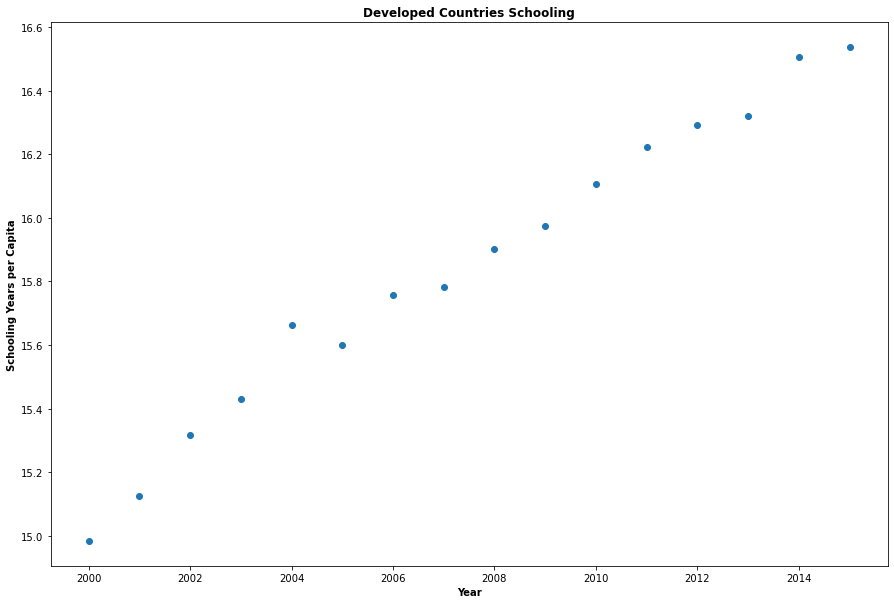

In [20]:
#change fig size
plt.figure(figsize = (15,10))

#plot schooling over the years for developed countries
plt.scatter(year_df_developed["Year"], year_df_developed["Schooling"])
plt.title("Developed Countries Schooling", fontweight = "bold")
plt.ylabel("Schooling Years per Capita", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.savefig("Images/developed_countries_school_scatter.png")
plt.show()


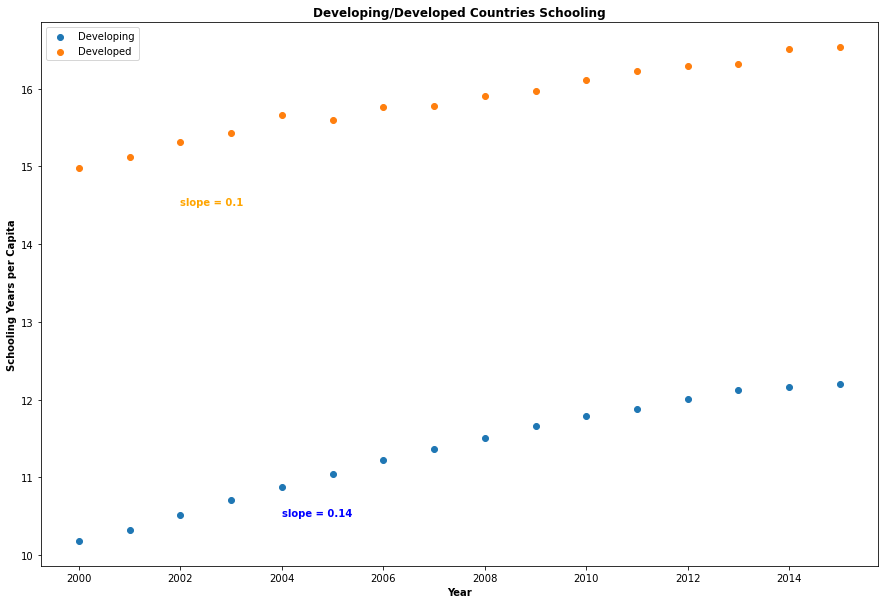

In [21]:
#change fig size
plt.figure(figsize = (15,10))

#plot schooling over the years for developing countries
plt.scatter(year_df_developing["Year"], year_df_developing["Schooling"], label = "Developing")
plt.scatter(year_df_developed["Year"], year_df_developed["Schooling"], label = "Developed")

#get slope for each line
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(year_df_developing["Year"], year_df_developing["Schooling"])
slope1 = round(slope1, 2)

(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(year_df_developed["Year"], year_df_developed["Schooling"])
slope2 = round(slope2, 2)




plt.title("Developing/Developed Countries Schooling", fontweight = "bold")
plt.ylabel("Schooling Years per Capita", fontweight = "bold")
plt.xlabel("Year", fontweight = "bold")
plt.annotate(f"slope = {slope1}", (2004, 10.5), color = "b", fontweight = "bold")
plt.annotate(f"slope = {slope2}", (2002, 14.5), color = "orange", fontweight = "bold")
plt.legend()


plt.savefig("Images/combined_countries_school_scatter.png")
plt.show()


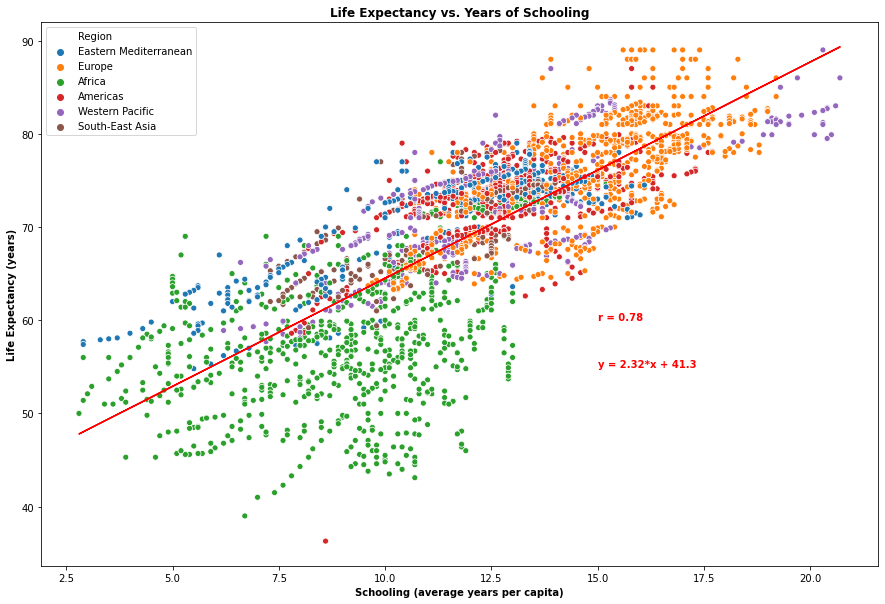

In [51]:
#change fig size
plt.figure(figsize = (15,10))

#plot life expectancy vs. schooling
sns.scatterplot(data=schooling_df, x="Schooling", y="Life Expectancy", hue="Region")
plt.title("Life Expectancy vs. Years of Schooling", fontweight="bold")
plt.xlabel("Schooling (average years per capita)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")

#perform regression on life expectancy vs. schooling
(slope, intercept, rvalue, pvalue, stderr) = linregress(schooling_df["Schooling"], schooling_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (schooling_df["Schooling"]*slope) + intercept
plt.plot(schooling_df["Schooling"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq, (15, 55), color = "r", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (15, 60), color = "r", fontweight = "bold")

plt.savefig("Images/consolidated_life_education_correlation.png")


plt.show()

In [25]:
#create a df of only developing countries
developing_df = schooling_df.loc[schooling_df["Status"] == "Developing"]
developing_df

,Country,Year,Region,Status,Life Expectancy,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,9.5
...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,9.8


In [39]:
developing_df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', '

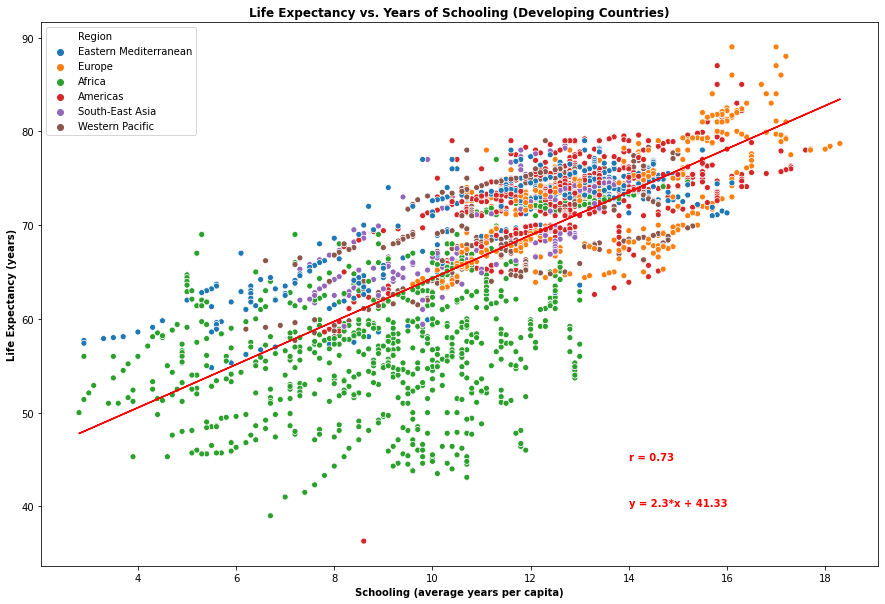

In [27]:
#change fig size
plt.figure(figsize = (15,10))

#plot life expectancy vs. schooling for the developing df
sns.scatterplot(data=developing_df, x="Schooling", y="Life Expectancy", hue="Region")
plt.title("Life Expectancy vs. Years of Schooling (Developing Countries)", fontweight="bold")
plt.xlabel("Schooling (average years per capita)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")

#perform regression on life expectancy vs. schooling for developing countries
(slope_d1, intercept_d1, rvalue_d1, pvalue_d1, stderr_d1) = linregress(developing_df["Schooling"], developing_df["Life Expectancy"])
slope_d1 = round(slope_d1, 2)
intercept_d1 = round(intercept_d1, 2)
rvalue_d1 = round(rvalue_d1, 2)
regress_values_d1 = (developing_df["Schooling"]*slope_d1) + intercept_d1
plt.plot(developing_df["Schooling"], regress_values_d1, "r-")
line_eq_d1 = f"y = {slope_d1}*x + {intercept_d1}"
plt.annotate(line_eq_d1, (14, 40), color = "r", fontweight = "bold")
r_eq_d1 = f"r = {rvalue_d1}"
plt.annotate(r_eq_d1, (14, 45), color = "r", fontweight = "bold")
plt.savefig("Images/developing_life_education_correlation")

plt.show()

In [28]:
#create a df of only developed countries
developed_df = schooling_df.loc[schooling_df["Status"] == "Developed"]
developed_df

,Country,Year,Region,Status,Life Expectancy,Schooling
112,Australia,2015,Western Pacific,Developed,82.8,20.4
113,Australia,2014,Western Pacific,Developed,82.7,20.4
114,Australia,2013,Western Pacific,Developed,82.5,20.3
115,Australia,2012,Western Pacific,Developed,82.3,20.1
116,Australia,2011,Western Pacific,Developed,82.0,19.8
...,...,...,...,...,...,...
2532,Switzerland,2004,Europe,Developed,81.0,15.1
2533,Switzerland,2003,Europe,Developed,85.0,15.0
2534,Switzerland,2002,Europe,Developed,84.0,15.2
2535,Switzerland,2001,Europe,Developed,82.0,15.2


In [29]:
#get list of developed countries
developed_df["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Denmark', 'Germany', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland'], dtype=object)

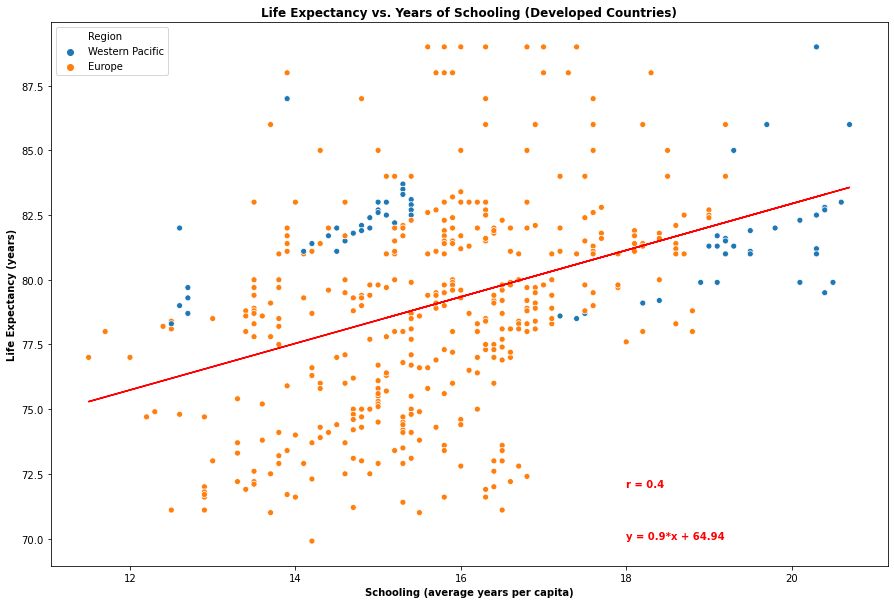

In [37]:
#change fig size
plt.figure(figsize = (15,10))

#plot life expectancy vs. schooling for the developed df
sns.scatterplot(data=developed_df, x="Schooling", y="Life Expectancy", hue="Region")
plt.title("Life Expectancy vs. Years of Schooling (Developed Countries)", fontweight="bold")
plt.xlabel("Schooling (average years per capita)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")


#perform regression on life expectancy vs. schooling for developed countries
(slope_d2, intercept_d2, rvalue_d2, pvalue_d2, stderr_d2) = linregress(developed_df["Schooling"], developed_df["Life Expectancy"])
slope_d2 = round(slope_d2, 2)
intercept_d2 = round(intercept_d2, 2)
rvalue_d2= round(rvalue_d2, 2)
regress_values_d2 = (developed_df["Schooling"]*slope_d2) + intercept_d2
plt.plot(developed_df["Schooling"], regress_values_d2, "r-")
line_eq_d2 = f"y = {slope_d2}*x + {intercept_d2}"
plt.annotate(line_eq_d2, (18, 70), color = "r", fontweight = "bold")
r_eq_d2 = f"r = {rvalue_d2}"
plt.annotate(r_eq_d2, (18, 72), color = "r", fontweight = "bold")
plt.savefig("Images/developed_life_education_correlation")

plt.show()

In [40]:
#look at one developing country and schooling requirements through the years
#get a df of just afghanistan
afghan_df = schooling_df.loc[schooling_df["Country"] == "Afghanistan"]
afghan_df

,Country,Year,Region,Status,Life Expectancy,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,9.5
5,Afghanistan,2010,Eastern Mediterranean,Developing,58.8,9.2
6,Afghanistan,2009,Eastern Mediterranean,Developing,58.6,8.9
7,Afghanistan,2008,Eastern Mediterranean,Developing,58.1,8.7
8,Afghanistan,2007,Eastern Mediterranean,Developing,57.5,8.4
9,Afghanistan,2006,Eastern Mediterranean,Developing,57.3,8.1


<Figure size 1080x720 with 0 Axes>

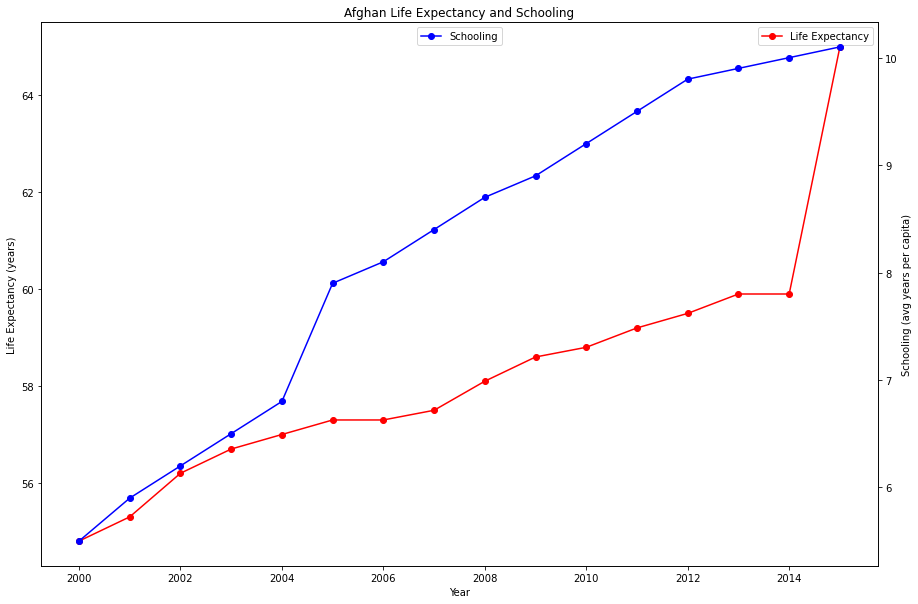

In [45]:
#change fig size
plt.figure(figsize = (15,10))

#plot life expectancy and schooling vs. year for Afghanistan (developing country)
#create figure and axis objects with subplots
figure, ax = plt.subplots(figsize = (15,10))
#make plot for one of the y axes
line1 = ax.plot(afghan_df["Year"], afghan_df["Life Expectancy"], color = "red", marker = "o", label = "Life Expectancy")
#set x axis label
ax.set_xlabel("Year")
#set the first y axis label
ax.set_ylabel("Life Expectancy (years)")

#twin object for two different y-axis on the same plot
ax2 = ax.twinx()
#make plot for the second y axis
line2 = ax2.plot(afghan_df["Year"], afghan_df["Schooling"], color = "blue", marker = "o", label="Schooling")
#set x axis label
ax2.set_xlabel("Year")
#set the second y axis label
ax2.set_ylabel("Schooling (avg years per capita)")
ax2.set_title("Afghan Life Expectancy and Schooling")

#add legend to discern what the lines represent
ax.legend()
ax2.legend(loc = "upper center")

#save fig and display fig
plt.savefig("Images/afghanistan.png")
plt.show()

In [47]:
#create df of just Hungary
hungary_df = schooling_df.loc[schooling_df["Country"] == "Hungary"]
hungary_df.head()

,Country,Year,Region,Status,Life Expectancy,Schooling
1154,Hungary,2015,Europe,Developed,75.8,15.6
1155,Hungary,2014,Europe,Developed,75.6,15.8
1156,Hungary,2013,Europe,Developed,75.5,15.4
1157,Hungary,2012,Europe,Developed,75.0,15.4
1158,Hungary,2011,Europe,Developed,74.8,15.4


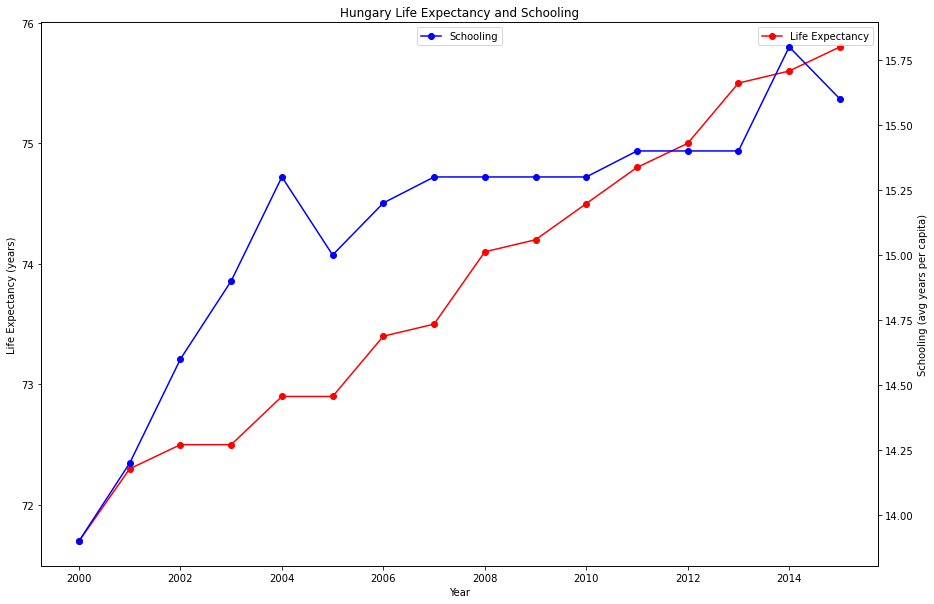

In [49]:
#create figure and axis objects with subplots
fig_h, ax_h =  plt.subplots(figsize = (15,10))

#make plot for one of the y axes
line1_h = ax_h.plot(hungary_df["Year"], hungary_df["Life Expectancy"], color = "red", marker = "o", label = "Life Expectancy")
#set x axis label
ax_h.set_xlabel("Year")
#set the first y axis label
ax_h.set_ylabel("Life Expectancy (years)")

#twin object for two different y-axes on the same plot
ax_h2 = ax_h.twinx()
#make plot for the second y axis
line2_h = ax_h2.plot(hungary_df["Year"], hungary_df["Schooling"], color = "blue", marker = "o", label="Schooling")
#set x axis label
ax_h2.set_xlabel("Year")
#set the second y axis label
ax_h2.set_ylabel("Schooling (avg years per capita)")
ax_h2.set_title("Hungary Life Expectancy and Schooling")

#add legend to discern what the lines represent
ax_h.legend()
ax_h2.legend(loc = "upper center")

#save fig and display fig
plt.savefig("Images/hungary.png", bbox_inches='tight')
plt.show()